# Preprocessing and Dimensionality Reduction

In [1]:
#   packages
import gc
import os

import pandas as pd
import numpy as np
from tqdm import tqdm

import re

import pickle

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer 

# Clusterizer
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

#   my packages
from preProcessing import textProcessing

# Hierarchical clustering

In [2]:
movie_genre_dataset = pd.read_pickle(os.path.join("data", "movie_genre_dataset_sample.pkl"))
movie_genre_dataset

,TITLE,GENRE,DESCRIPTION,tokens,preProc
27552,Road Less Traveled (2017),romance,Country music singer Charlotte comes back home...,"[country, music, singer, come, back, home, wee...",country music singer come back home week set m...
10654,"""Whitetail Diaries"" (2008)",sport,"Each week, Yamaha's Whitetail Diaries brings v...","[week, bring, viewer, good, whitetail, deer, h...",week bring viewer good whitetail deer hunting ...
16297,Nela (2016),romance,"George a blind , handsome and wealthy boy and ...","[blind, handsome, wealthy, boy, ugly, poor, gi...",blind handsome wealthy boy ugly poor girl life...
12486,Kayla's Dangerous Bondage Dreams (2011),adventure,"Beset by successive nights full of bad dreams,...","[successive, night, full, bad, dream, beautifu...",successive night full bad dream beautiful brun...
1365,The Demoore Frequency (1997),adventure,A mad scientist invents a device which creates...,"[mad, scientist, invent, device, create, tone,...",mad scientist invent device create tone cause ...
...,...,...,...,...,...
25045,Dalagang bukid (1919),romance,This is the first Filipino feature-length film...,"[first, filipino, feature, length, film, make,...",first filipino feature length film make filipi...
52397,"""Chiu shih yao ni ai shang wo"" (2013)",romance,Revolves around Cheng Liang Liang who after so...,"[revolve, unfortunate, event, end, live, house...",revolve unfortunate event end live house new b...
50842,Rocket Pack Jack and the Babylon Virus (2014),adventure,"While on a mission, secret agent Rocket Pack J...","[mission, secret, agent, find, cornered, enlis...",mission secret agent find cornered enlist help...
11577,Lisa Whelchel's Everyday Workout for the Every...,sport,The Facts of Life star and mother of three sha...,"[fact, star, mother, share, favorite, workout,...",fact star mother share favorite workout safe s...


In [3]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_preProc = tfidf_vectorizer.fit_transform(movie_genre_dataset.preProc).toarray()
X_tfidf_preProc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Single method: maximum similarity

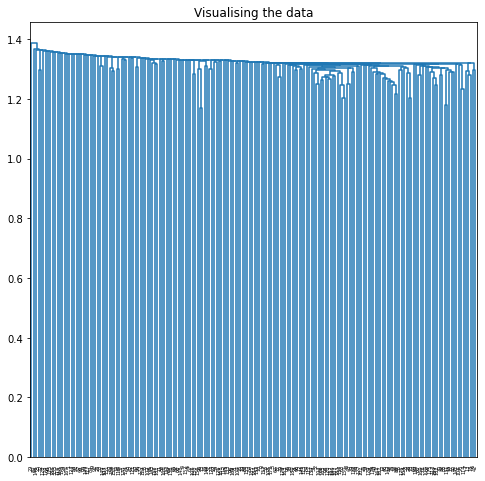

In [4]:
# Create the Dendogram plot
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(X_tfidf_preProc, method ='single')))

In [5]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
predictedCluster = cluster.fit_predict(X_tfidf_preProc)

movie_genre_dataset["clusterPreP"]=list(predictedCluster)
movie_genre_dataset[["GENRE","clusterPreP"]].groupby(["GENRE","clusterPreP"]).size()

GENRE      clusterPreP
adventure  0              81
           1               1
           2               1
           3               1
romance    0              58
sport      0              46
dtype: int64

#### Complete method: minimum similarity

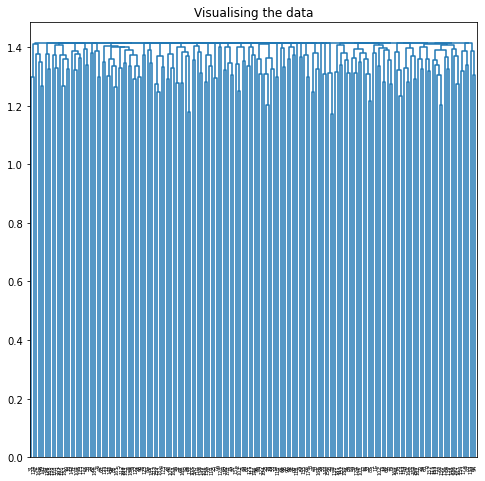

In [6]:
# Create the Dendogram plot
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(X_tfidf_preProc, method ='complete')))

In [7]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
predictedCluster = cluster.fit_predict(X_tfidf_preProc)

movie_genre_dataset["clusterPreP"]=list(predictedCluster)
movie_genre_dataset[["GENRE","clusterPreP"]].groupby(["GENRE","clusterPreP"]).size()

GENRE      clusterPreP
adventure  0              74
           1               1
           2               8
           3               1
romance    0              50
           1               1
           2               7
sport      0              34
           1               3
           2               4
           3               5
dtype: int64

#### Average method: average inter-similarity

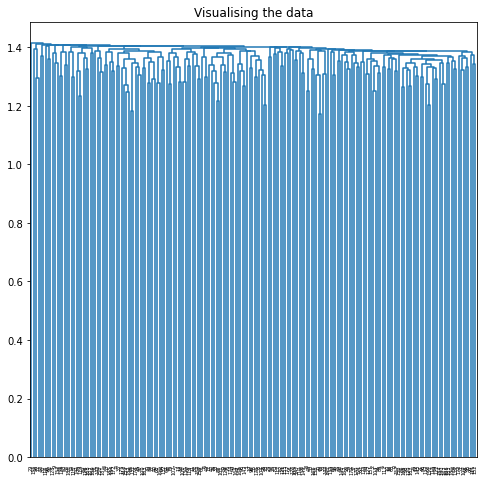

In [8]:
# Create the Dendogram plot
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(X_tfidf_preProc, method ='average')))

In [9]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
predictedCluster = cluster.fit_predict(X_tfidf_preProc)

movie_genre_dataset["clusterPreP"]=list(predictedCluster)
movie_genre_dataset[["GENRE","clusterPreP"]].groupby(["GENRE","clusterPreP"]).size()

GENRE      clusterPreP
adventure  0              81
           1               2
           3               1
romance    0              58
sport      0              43
           2               3
dtype: int64

#### Ward method: average of all similarities

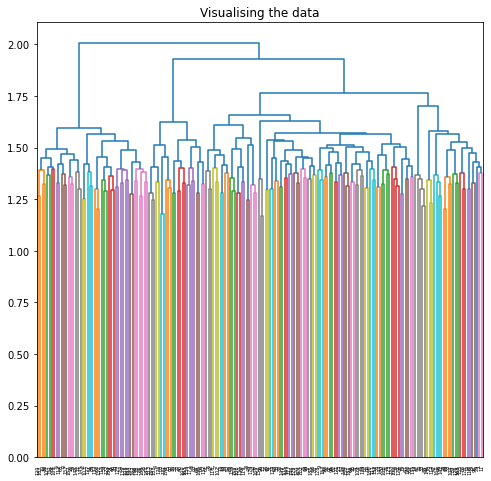

In [10]:
# Create the Dendogram plot
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(X_tfidf_preProc, method ='ward')))

In [11]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
predictedCluster = cluster.fit_predict(X_tfidf_preProc)

movie_genre_dataset["clusterPreP"]=list(predictedCluster)

In [12]:
movie_genre_dataset[["GENRE","clusterPreP"]].groupby(["GENRE","clusterPreP"]).size()

GENRE      clusterPreP
adventure  0               9
           1              44
           2              23
           3               8
romance    0               1
           1              21
           3              36
sport      0              19
           1              23
           2               1
           3               3
dtype: int64

100%|██████████| 8/8 [00:03<00:00,  2.31it/s]


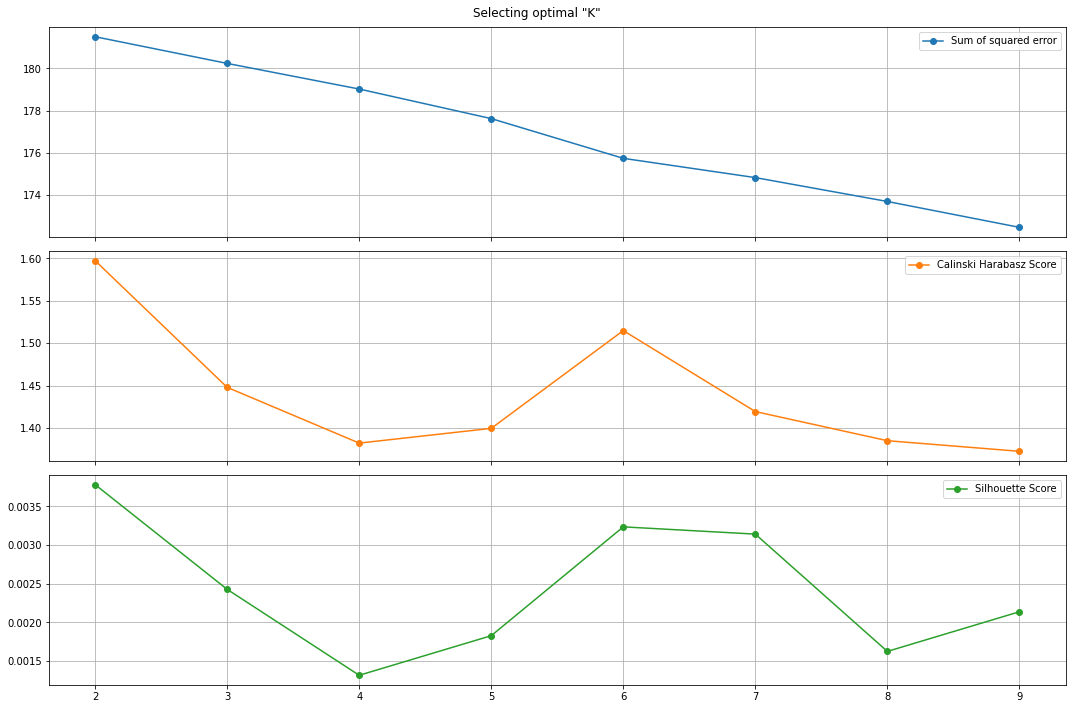

In [14]:
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans

gc.collect()

dataToCluster=X_tfidf_preProc

search_range = range(2, 10)
report = {}
for k in tqdm(search_range):
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=300,
                    random_state=1,
                    verbose=0).fit(dataToCluster)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia #   Elbow method
    try:
        cluster = kmeans.predict(dataToCluster)
        chs = metrics.calinski_harabasz_score(dataToCluster, cluster)
        ss = metrics.silhouette_score(dataToCluster, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [18]:
n_clusters_=4
model = KMeans(n_clusters=n_clusters_, init='k-means++', max_iter=1000, n_init=10)
model.fit(dataToCluster)

movie_genre_dataset["clusterKmean"]=list(model.labels_)

movie_genre_dataset[["GENRE","clusterKmean"]].groupby(["GENRE","clusterKmean"]).size()

GENRE      clusterKmean
adventure  0               13
           1               24
           2               33
           3               14
romance    0                8
           1               21
           2               16
           3               13
sport      0               33
           1                6
           2                6
           3                1
dtype: int64